Supposons que chaque gisement dispose d'un coût d'exploitation fixe et d'une quantité de pétrole finie. Supposons des agents exploitant ces gisements en commençant par le plus rentable.

[1] Premières hypothèses importants: la distribution des gisements. Merci à l'AIE qui décide de faire payer 6000 euros l'accés à ces données essentielles à l'économie. Je fas pour l'instant les hypothèses suivantes : 
    - la capacité de ces gisements suit une loi normale
    - le cout d'exploitation de ces gisements suit une loi linéaire
    
On pourra tenter de modifier ces hypothèses par la suite

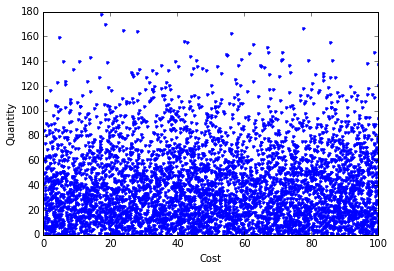

In [28]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

initdeposits = list()

for i in range(5000):
    qte = abs(random.gauss(0,50))
    price = random.random()*100.0
    initdeposits.append([qte, price])

plt.plot([d[1] for d in initdeposits], [d[0] for d in initdeposits], '.')
plt.xlabel('Cost')
plt.ylabel('Quantity');


En haut à gauche: l'Arabie Saoudite

En haut à droite: les sables bitumineux de l'Alaska

En bas à gauche: le Texas

En bas à droite: tous les autres puits non encore épuisés

[2] Supposons que chaque puit ait le même flux de sortie: une unité par an. Modélisons l'épuisement

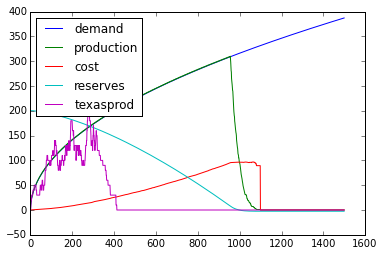

In [16]:
import copy

deposits = copy.deepcopy(initdeposits)
deposits.sort(cmp=(lambda x,y:cmp(x[1],y[1])))
opensites=list()

currentindex = 0
data=list()
reserves = sum([s[0] for s in deposits])
demand = 1

texassites = list()
for i in range(500):
    s = random.choice(deposits)
    if s[1]<20:
        s.append('texas')

for i in range(0,1500):
    demand = math.sqrt(i)*10
    currentproduction = 0
    currentcost = 0
    texasprod = 0
    depleted=list()
    for site in opensites:
        site[0]-=1
        reserves-=1
        currentcost+=site[1]
        currentproduction+=1
        if len(site)>2:
            texasprod += 1
        if site[0]<=0:
            depleted.append(site)
    for s in depleted:
        opensites.remove(s)
    while currentproduction<demand and currentindex<len(deposits):
        opensites.append(deposits[currentindex])
        currentproduction += 1
        currentcost += deposits[currentindex][1]
        currentindex += 1
    data.append([demand, currentproduction, currentcost/(float(currentproduction)+0.1), reserves, texasprod])

plt.plot([d[0] for d in data], label="demand")
plt.plot([d[1] for d in data], label="production")
plt.plot([d[2] for d in data], label="cost")
plt.plot([d[3]/1000.0 for d in data], label="reserves")
plt.plot([d[4]*10.0 for d in data], label="texasprod")
plt.legend(loc='upper left')